# S3E21 EDA which kind of makes sense

A slightly deeper exploration of data and models outputs. 

In [1]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 43.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=819462 sha256=0f1f874ed73e4e4d951555264df3993c20ca641e65131885eac421e98d55cb4c
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan


In [2]:
 !pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 8.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 18.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 69.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 98.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 46.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 84.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━

[ 0 -1  0 -1  0 -1  0 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1  0 -1 -1  0
 -1 -1 -1  0 -1 -1  0  0 -1  0 -1  0 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1  1 -1  1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


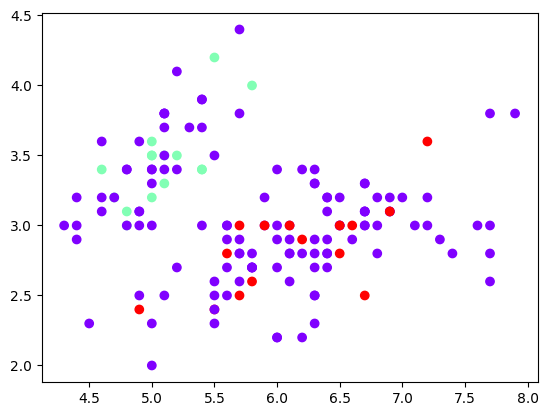

In [3]:
import numpy as np
import hdbscan
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
#X, y = make_classification(n_samples=300, n_features=5, random_state=42)

from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# The features are stored in the 'data' field of the returned object
X = iris.data

# The labels are stored in the 'target' field
y = iris.target


# Apply HDBSCAN algorithm
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
labels = clusterer.fit_predict(X)

max_samples = 15  # Define your max_samples constraint

# Post-processing to enforce max_samples constraint
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:  # Ignore noise
        continue
    cluster_indices = np.where(labels == label)[0]
    if len(cluster_indices) > max_samples:
        # If the cluster is too large, mark the excess samples as noise
        np.random.shuffle(cluster_indices)
        labels[cluster_indices[max_samples:]] = -1

print(labels)
print(y)
# Plot the results
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[ 1  2  2  2  1  2  2  1  2  1  1  1  2  2  3  3  3  1  3  1  1  1  2  1
  2  2  1  1  1  2  2  1  3  3  1  1  1  1  2  1  1 -1  2  2  2  2  2  2
  3  2  4  4  4  5  4  5  4 -1  4  5 -1  5  5  4 -1  4  5  5 -1  5  6  5
  4  6  4  4  4  4  6  5  5  5  5  6  7  4  4 -1  5  5  5  4  5 -1  5  5
  5  4 -1  5  8  6  8  6  6 -1 -1  8 -1 -1  4  6  8  6  6  8  6 -1 -1 -1
  8  6 -1  4  8  8  4  6  6  8  8 -1  6  6 -1 -1  8  6  6  8  8  8  6  8
  8  8  6  4  8  6]


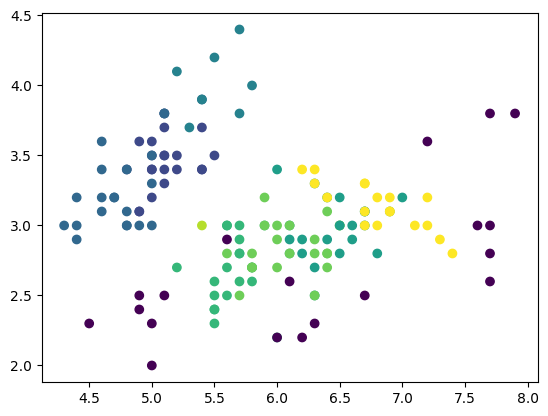

In [4]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def dbscan(X, eps, min_samples, max_samples):
    labels = np.full(X.shape[0], -1)
    cluster_sizes = np.zeros(X.shape[0], dtype=int)
    C = 0

    for i in range(X.shape[0]):
        if labels[i] != -1:
            continue
        neighbors = find_neighbors(X, i, eps)
        if len(neighbors) < min_samples:
            labels[i] = -1  # label as noise
        else:
            C += 1
            expand_cluster(X, labels, cluster_sizes, i, neighbors, C, eps, min_samples, max_samples)

    return labels

def find_neighbors(X, i, eps):
    return np.where(np.linalg.norm(X - X[i], axis=1) <= eps)[0]

def expand_cluster(X, labels, cluster_sizes, i, neighbors, C, eps, min_samples, max_samples):
    labels[i] = C
    cluster_sizes[C] += 1
    k = 0
    while k < len(neighbors):
        j = neighbors[k]
        if labels[j] == -1:
            labels[j] = C
            cluster_sizes[C] += 1
            if cluster_sizes[C] > max_samples:
                return
            new_neighbors = find_neighbors(X, j, eps)
            if len(new_neighbors) >= min_samples:
                neighbors = np.concatenate((neighbors, new_neighbors))
        elif labels[j] == 0:
            labels[j] = C
            cluster_sizes[C] += 1
            if cluster_sizes[C] > max_samples:
                return
        k += 1

# Example usage
from sklearn.datasets import make_moons
#X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, random_state=42)


from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# The features are stored in the 'data' field of the returned object
X = iris.data

# The labels are stored in the 'target' field
y = iris.target

labels = dbscan(X, eps=0.5, min_samples=5, max_samples=20)

print(y)
print(labels)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()

In [5]:
import pandas as pd

# Read the Stata data file
df = pd.read_stata('/kaggle/input/nsch2022-screener/nsch_2022e_screener.dta')

# Write the DataFrame to a CSV file
#df.to_csv('NSCH2022E.csv', index=False)

#dfcsv = pd.read_csv('/kaggle/working/NSCH2022E.csv')

df[df.isna().any(axis=1)]
#df = df.dropna()
#df['c_age_years']

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/nsch2022-screener/nsch_2022e_screener.dta'

In [ ]:
#This is topical process
import pandas as pd

# Read the Stata data file
df = pd.read_stata('/kaggle/input/nsch-2022-topical/nsch_2022e_topical.dta')

# Write the DataFrame to a CSV file
#df.to_csv('NSCH2022E.csv', index=False)

#dfcsv = pd.read_csv('/kaggle/working/NSCH2022E.csv')

#df = df.drop(['cbsafp_yn', 'c_k2q11', 'c_k2q12', 'c_k2q14','c_k2q15','c_k2q17', 'c_k2q18', 'c_k2q20', 'c_k2q21','c_k2q23'], axis=1)
df = df.drop(['k2q35a_1_years', 'height', 'weight'], axis=1)
df[df.isna().any(axis=1)]
#df = df.dropna()
#df['sc_age_years']

columns_with_na = df.columns[df.isna().any()].tolist()

#print(columns_with_na)
print(df.describe())

In [ ]:
#This is topical process
import pandas as pd

# Read the Stata data file
df = pd.read_stata('/kaggle/input/nsch-2020-topical-stata/nsch_2020_topical.dta')

# Write the DataFrame to a CSV file
#df.to_csv('NSCH2022E.csv', index=False)

#dfcsv = pd.read_csv('/kaggle/working/NSCH2022E.csv')

#df = df.drop(['cbsafp_yn', 'c_k2q11', 'c_k2q12', 'c_k2q14','c_k2q15','c_k2q17', 'c_k2q18', 'c_k2q20', 'c_k2q21','c_k2q23'], axis=1)
#df = df.drop(['k2q35a_1_years', 'height', 'weight'], axis=1)
#df[df.isna().any(axis=1)]
#df = df.dropna()
#df['sc_age_years']

columns_with_na = df.columns[df.isna().any()].tolist()

#print(columns_with_na)
df

In [ ]:
#corr
import pandas as pd

# Read the Stata data file
df = pd.read_stata('/kaggle/input/nsch-2020-topical-stata/nsch_2020_topical.dta')

dfcorr = df.corr()
dfcorr.to_csv('corr2020.csv')
dfcorr

In [2]:
#selected var
#This is topical process
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the Stata data file
df2020 = pd.read_stata('/kaggle/input/nsch-2020-topical-stata/nsch_2020_topical.dta')
df2021 = pd.read_stata('/kaggle/input/nsch-2021-topical-stata/nsch_2021e_topical.dta')
df2022 = pd.read_stata('/kaggle/input/nsch-2022-topical/nsch_2022e_topical.dta')

newdf2020 = df2020[['sc_age_years', 'docprivate','sc_sex','overweight','stomach','headache','toothaches','breathing','allergies','memorycond','errandalone','k2q32a','k2q31a','k2q33a','k2q38a','makefriend','k7q30','k7q33','hoursleep','screentime','physactiv','bedtime','k7q02r_r','a1_age','ace3','ace5','ace6','ace7','ace8','ace9']]
newdf2021 = df2021[['sc_age_years', 'docprivate','sc_sex','overweight','stomach','headache','toothaches','breathing','allergies','memorycond','errandalone','k2q32a','k2q31a','k2q33a','k2q38a','makefriend','k7q30','k7q33','hoursleep','screentime','physactiv','bedtime','k7q02r_r','a1_age','ace3','ace5','ace6','ace7','ace8','ace9']]
newdf2022 = df2022[['sc_age_years', 'docprivate','sc_sex','overweight','stomach','headache','toothaches','breathing','allergies','memorycond','errandalone','k2q32a','k2q31a','k2q33a','k2q38a','makefriend','k7q30','k7q33','hoursleep','screentime','physactiv','bedtime','k7q02r_r','a1_age','ace3','ace5','ace6','ace7','ace8','ace9']]

#columns_with_na = df.columns[df.isna().any()].tolist()

#df_train = df[['sc_age_years', 'docprivate','sc_sex','overweight','stomach','headache','toothaches','breathing','allergies','memorycond','errandalone','k2q32a','k2q31a','k2q33a','k2q38a','makefriend','k7q30','k7q33','hoursleep','screentime','physactiv','bedtime','k7q02r_r','a1_age','ace3','ace5','ace6','ace7','ace8','ace9']]
merged_df = pd.concat([newdf2020, newdf2021, newdf2022])

merged_df = merged_df.dropna(subset=['k2q32a'])

train_df_X = merged_df[['sc_age_years', 'docprivate','sc_sex','overweight','stomach','headache','toothaches','breathing','allergies','memorycond','errandalone','k2q31a','k2q33a','k2q38a','makefriend','k7q30','k7q33','hoursleep','screentime','physactiv','bedtime','k7q02r_r','a1_age','ace3','ace5','ace6','ace7','ace8','ace9']]
train_df_y = merged_df[['k2q32a']]

X_train, X_test, y_train, y_test = train_test_split(train_df_X, train_df_y, test_size=0.2, random_state=123)

X_train.to_csv('X_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

In [4]:
merged_df_nan = merged_df.dropna()

train_df_X_nan = merged_df_nan[['sc_age_years', 'docprivate','sc_sex','overweight','stomach','headache','toothaches','breathing','allergies','memorycond','errandalone','k2q31a','k2q33a','k2q38a','makefriend','k7q30','k7q33','hoursleep','screentime','physactiv','bedtime','k7q02r_r','a1_age','ace3','ace5','ace6','ace7','ace8','ace9']]
train_df_X_nan_withoutpsy = merged_df_nan[['sc_age_years', 'docprivate','sc_sex','overweight','stomach','headache','toothaches','breathing','allergies','makefriend','k7q30','k7q33','hoursleep','screentime','physactiv','bedtime','k7q02r_r','a1_age','ace3','ace5','ace6','ace7','ace8','ace9']]
train_df_y_nan = merged_df_nan[['k2q32a']]

In [5]:
has_nan = train_df_X_nan.isnull().values.any()

print(has_nan)  # 如果有NaN，输出True，否则输出False

False


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train = pd.read_csv('/kaggle/input/nsch-concat-index/X_train (1).csv')
X_test = pd.read_csv('/kaggle/input/nsch-concat-index/X_test (1).csv')
y_train = pd.read_csv('/kaggle/input/nsch-concat-index/y_train (1).csv')
y_test = pd.read_csv('/kaggle/input/nsch-concat-index/y_test (1).csv')

combined_df = pd.concat([X_test, y_test], axis=1)
combined_df
#filtered_df = combined_df[combined_df['k2q32a'] == 2]
#print(filtered_df)

# 提取正样本
positive_samples = combined_df[combined_df['k2q32a'] == 1]

# 提取相同数量的负样本
negative_samples = combined_df[combined_df['k2q32a'] == 2].sample(n=len(positive_samples), random_state=42)

# 合并正负样本
balanced_testset = pd.concat([positive_samples, negative_samples])
balanced_testset = balanced_testset.sample(frac=1, random_state=42)
balanced_testset = balanced_testset.dropna()

balanced_X_test_withoupsy = balanced_testset[['sc_age_years', 'docprivate','sc_sex','overweight','stomach','headache','toothaches','breathing','allergies','makefriend','k7q30','k7q33','hoursleep','screentime','physactiv','bedtime','k7q02r_r','a1_age','ace3','ace5','ace6','ace7','ace8','ace9']]
balanced_X_test = balanced_testset[['sc_age_years', 'docprivate','sc_sex','overweight','stomach','headache','toothaches','breathing','allergies','memorycond','errandalone','k2q31a','k2q33a','k2q38a','makefriend','k7q30','k7q33','hoursleep','screentime','physactiv','bedtime','k7q02r_r','a1_age','ace3','ace5','ace6','ace7','ace8','ace9']]
balanced_y_test = balanced_testset[['k2q32a']]
# 可选：打印合并后的 DataFrame
print(balanced_y_test)
balanced_X_test.to_csv('balanced_X_test',index=False)
balanced_y_test.to_csv('balanced_y_test',index=False)

       k2q32a
19917     1.0
25266     1.0
15307     1.0
11654     1.0
6429      1.0
...       ...
6368      1.0
23512     1.0
20561     1.0
24436     1.0
16005     1.0

[1385 rows x 1 columns]


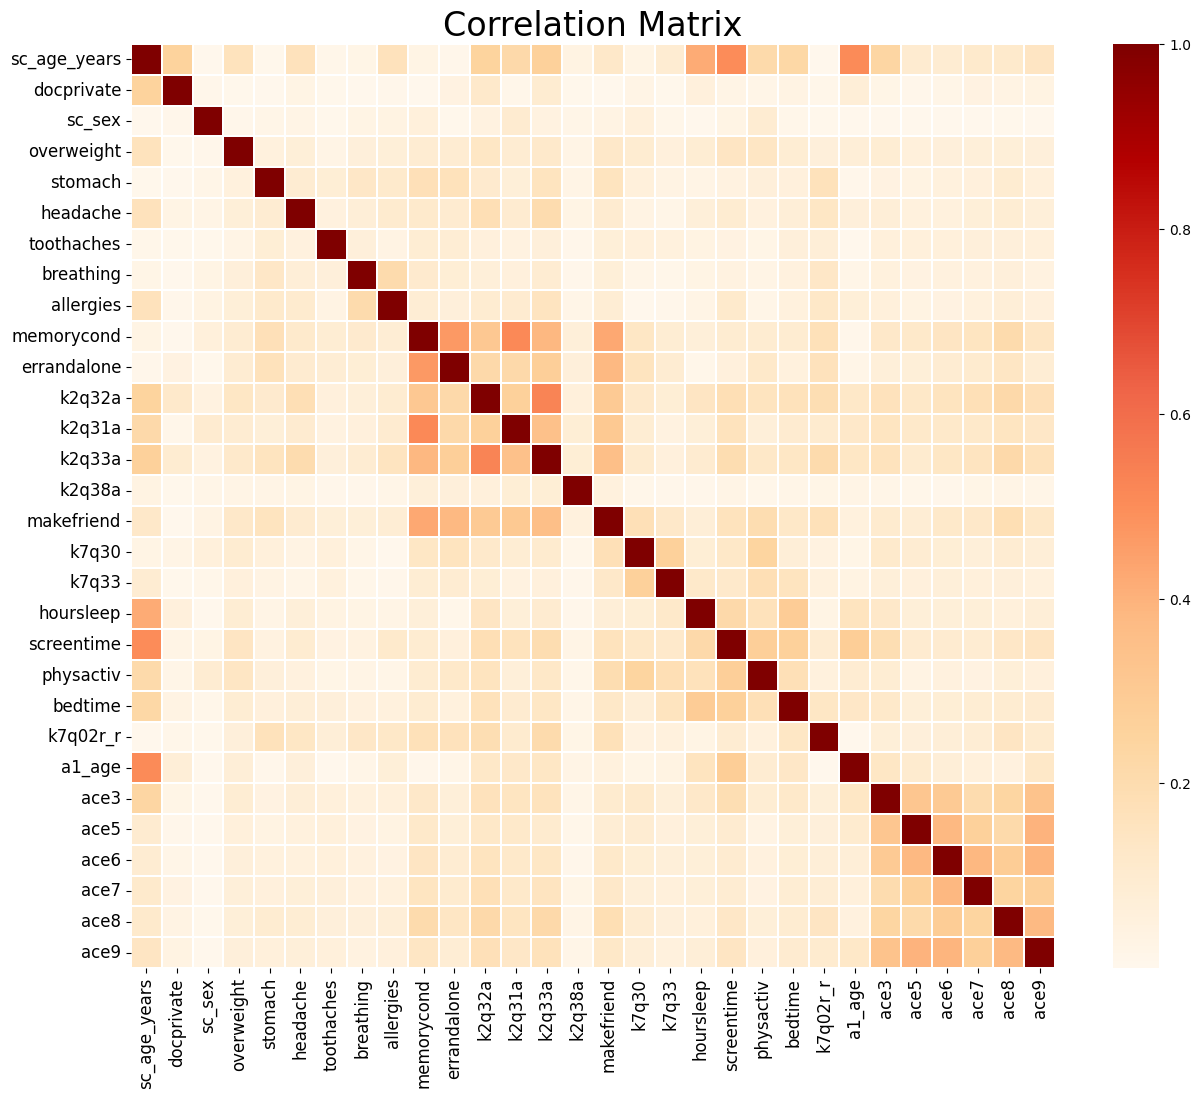

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
correlation_matrix = abs(merged_df.corr())
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, linewidths=0.25,vmax=1.0,
            square=True,linecolor='white',annot=False,cmap='OrRd')
plt.title('Correlation Matrix', fontdict = {'size':'24'} )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("test.svg",format='svg')
plt.show()

In [4]:
#重要性的训练
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
import numpy as np
data=SimpleImputer(missing_values=np.nan,strategy='mean')
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1,min_samples_leaf = 5,oob_score=True,random_state = 42)
#rf.fit(X_train, y_train)

dataMode=data.fit_transform(X_train)
dataModetest=data.fit_transform(X_train)
rf.fit(dataMode, y_train)

result_test = permutation_importance(rf, dataMode, y_train, n_repeats=7, random_state=42, n_jobs=2)
#feat_importances = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = True)

/tmp/ipykernel_32/2740737106.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(dataMode, y_train)


In [2]:
#测试shap
!pip install shap

In [ ]:
import xgboost
import shap


model = xgboost.XGBRegressor().fit(balanced_X_test, balanced_y_test)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(balanced_X_test)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

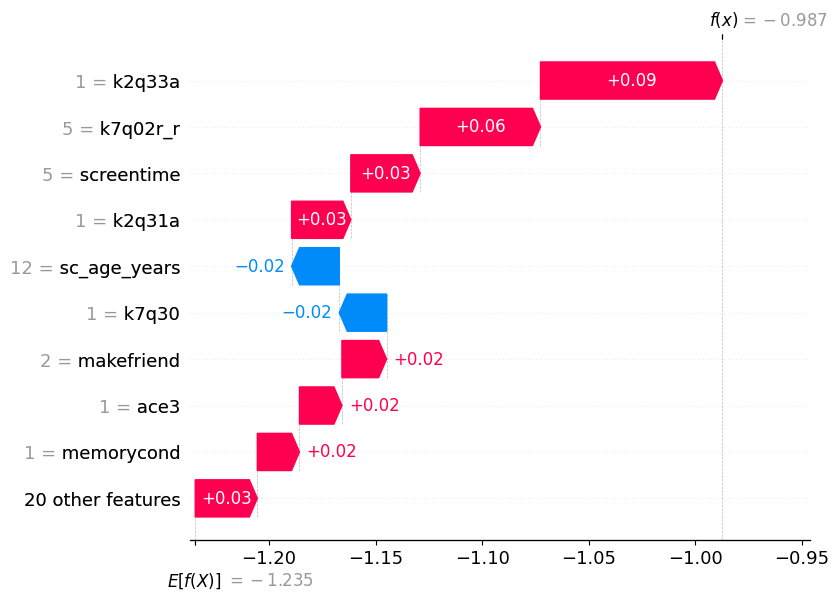

In [41]:
import xgboost
import shap


model = xgboost.XGBRegressor().fit(balanced_X_test, -balanced_y_test)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(balanced_X_test)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [17]:
import xgboost
import shap


model = xgboost.XGBRegressor().fit(train_df_X_nan_withoutpsy, -train_df_y_nan)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(train_df_X_nan_withoutpsy)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

NameError: name 'train_df_X_nan' is not defined

In [44]:
shap.initjs()
shap.plots.force(shap_values[0, ...])

In [19]:
import sklearn
model2 = sklearn.linear_model.LinearRegression().fit(train_df_X_nan_withoutpsy, -train_df_y_nan)

explainer = shap.explainers.Linear(model2, train_df_X_nan_withoutpsy)
shap_values = explainer(train_df_X_nan_withoutpsy)

In [11]:
shap.plots.beeswarm(shap_values,cmap='viridis')
shap.plots.beeswarm(shap_values,)

TypeError: beeswarm() got an unexpected keyword argument 'cmap'

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


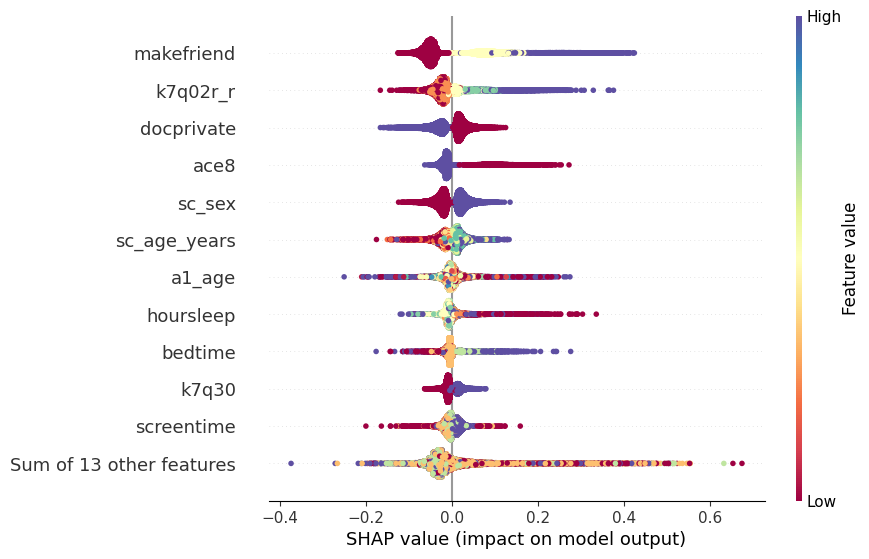

In [24]:
import matplotlib.pyplot as plt


plt.rcParams['font.family']='serif'
plt.rcParams['font.serif']='Times New Roman'
plt.rcParams['font.size']=13 #设置字体大小为14
plt.gcf().set_size_inches(7, 6)
#shap.summary_plot(shap_values, train_df_X_nan,cmap='Spectral', max_display=10,show=False)
shap.plots.beeswarm(shap_values,color=plt.get_cmap("Spectral"),show=False, max_display=12)
#shap.plots.beeswarm(

#plt.title('SHAP values for Iris Dataset', fontfamily='monospace', fontweight='bold', fontsize=16)



plt.savefig('beeswarm1.png',dpi=400,bbox_inches = 'tight')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


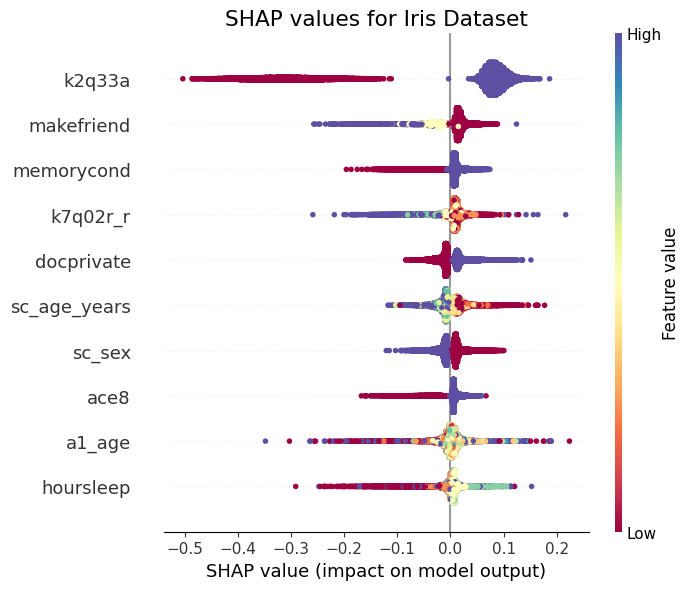

In [59]:
import matplotlib.pyplot as plt


plt.rcParams['font.family']='serif'
plt.rcParams['font.serif']='Times New Roman'
plt.rcParams['font.size']=13 #设置字体大小为14

#shap.summary_plot(shap_values, train_df_X_nan,cmap='Spectral', max_display=10,show=False)
shap.summary_plot(shap_values, train_df_X_nan,cmap='Spectral', max_display=10,show=False)

plt.title('SHAP values for Iris Dataset')
plt.gcf().set_size_inches(7, 6)


plt.savefig('beeswarm1.png',dpi=400,bbox_inches = 'tight')

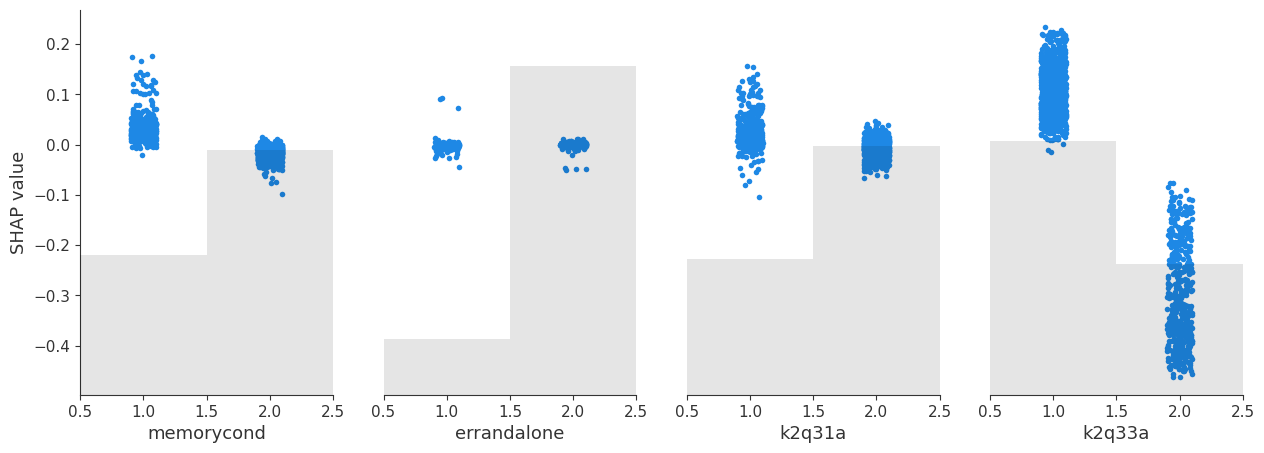

In [43]:
shap.plots.scatter(shap_values[:, [9,10,11,12]])

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_sto

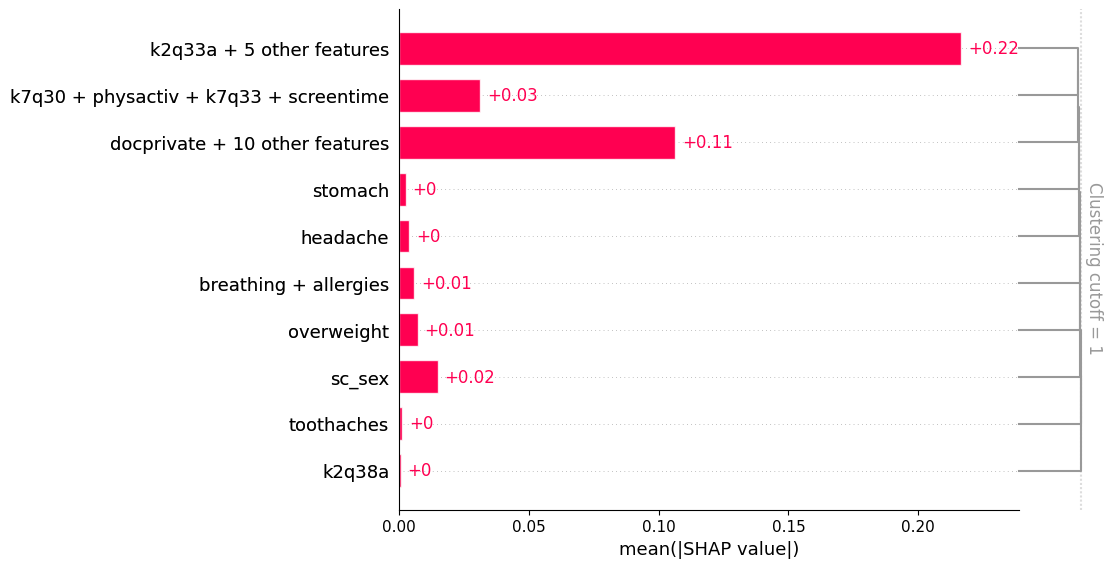

In [92]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(train_df_X_nan)

clust = shap.utils.hclust(train_df_X_nan, train_df_y_nan, linkage="single")
shap.plots.bar(shap_values, clustering=clust, clustering_cutoff=1)

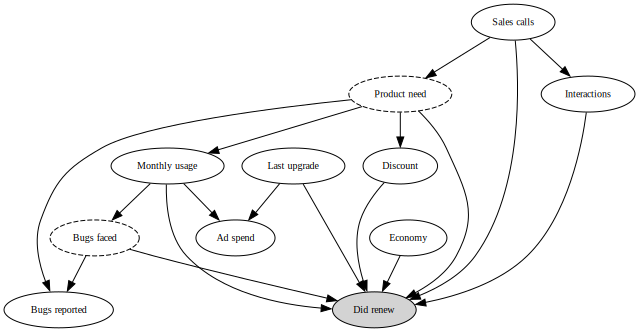

In [90]:
import graphviz

names = [
    "Bugs reported",
    "Monthly usage",
    "Sales calls",
    "Economy",
    "Discount",
    "Last upgrade",
    "Ad spend",
    "Interactions",
]
g = graphviz.Digraph()
for name in names:
    g.node(name, fontsize="10")
g.node("Product need", style="dashed", fontsize="10")
g.node("Bugs faced", style="dashed", fontsize="10")
g.node("Did renew", style="filled", fontsize="10")

g.edge("Product need", "Did renew")
g.edge("Product need", "Discount")
g.edge("Product need", "Bugs reported")
g.edge("Product need", "Monthly usage")
g.edge("Discount", "Did renew")
g.edge("Monthly usage", "Bugs faced")
g.edge("Monthly usage", "Did renew")
g.edge("Monthly usage", "Ad spend")
g.edge("Economy", "Did renew")
g.edge("Sales calls", "Did renew")
g.edge("Sales calls", "Product need")
g.edge("Sales calls", "Interactions")
g.edge("Interactions", "Did renew")
g.edge("Bugs faced", "Did renew")
g.edge("Bugs faced", "Bugs reported")
g.edge("Last upgrade", "Did renew")
g.edge("Last upgrade", "Ad spend")
g

In [4]:
#selected var
#This is topical process
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the Stata data file
df2020 = pd.read_stata('/kaggle/input/nsch-2020-topical-stata/nsch_2020_topical.dta')
df2021 = pd.read_stata('/kaggle/input/nsch-2021-topical-stata/nsch_2021e_topical.dta')
df2022 = pd.read_stata('/kaggle/input/nsch-2022-topical/nsch_2022e_topical.dta')

newdf2020_ = df2020[['sc_age_years', 'docprivate','sc_sex','overweight','stomach','headache','toothaches','breathing','allergies','memorycond','errandalone','k2q32a','k2q31a','k2q33a','k2q38a','makefriend','k7q30','k7q33','hoursleep','screentime','physactiv','bedtime','k7q02r_r','a1_age','ace3','ace5','ace6','ace7','ace8','ace9']]
newdf2021_ = df2021[['sc_age_years', 'docprivate','sc_sex','overweight','stomach','headache','toothaches','breathing','allergies','memorycond','errandalone','k2q32a','k2q31a','k2q33a','k2q38a','makefriend','k7q30','k7q33','hoursleep','screentime','physactiv','bedtime','k7q02r_r','a1_age','ace3','ace5','ace6','ace7','ace8','ace9']]
newdf2022_ = df2022[['sc_age_years', 'docprivate','sc_sex','overweight','stomach','headache','toothaches','breathing','allergies','memorycond','errandalone','k2q32a','k2q31a','k2q33a','k2q38a','makefriend','k7q30','k7q33','hoursleep','screentime','physactiv','bedtime','k7q02r_r','a1_age','ace3','ace5','ace6','ace7','ace8','ace9']]

#columns_with_na = df.columns[df.isna().any()].tolist()

#df_train = df[['sc_age_years', 'docprivate','sc_sex','overweight','stomach','headache','toothaches','breathing','allergies','memorycond','errandalone','k2q32a','k2q31a','k2q33a','k2q38a','makefriend','k7q30','k7q33','hoursleep','screentime','physactiv','bedtime','k7q02r_r','a1_age','ace3','ace5','ace6','ace7','ace8','ace9']]
merged_df_ = pd.concat([newdf2020_, newdf2021_, newdf2022_])

merged_df_ = merged_df_.dropna(subset=['k2q32a'])

train_df_X = merged_df[['sc_age_years', 'docprivate','sc_sex','overweight','stomach','headache','toothaches','breathing','allergies','memorycond','errandalone','k2q31a','k2q33a','k2q38a','makefriend','k7q30','k7q33','hoursleep','screentime','physactiv','bedtime','k7q02r_r','a1_age','ace3','ace5','ace6','ace7','ace8','ace9']]
train_df_y = merged_df[['k2q32a']]

X_train, X_test, y_train, y_test = train_test_split(train_df_X, train_df_y, test_size=0.2, random_state=123)

X_train.to_csv('X_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

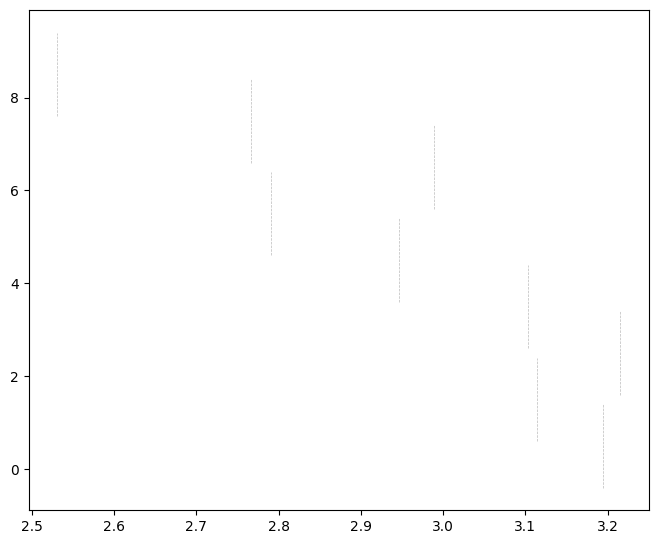

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gbdt_clf.fit(train_df_X_nan, train_df_y_nan)

explainer = shap.Explainer(gbdt_clf)
shap_values1 = explainer(train_df_X_nan)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values1[0])

下面的part是其他方式的重要度计算

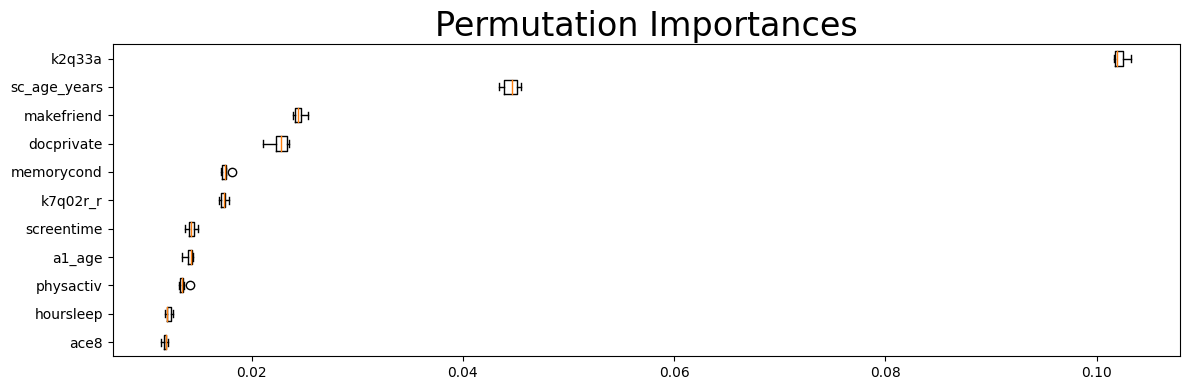

In [13]:
sorted_idx = result_test.importances_mean.argsort()

sorted_idx = sorted_idx[18:29]

fig, ax = plt.subplots(figsize=(12,4))
ax.boxplot(result_test.importances[sorted_idx].T *4,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances" , fontdict = {'size':'24'})
fig.tight_layout()
plt.savefig("importance.svg",format='svg')
plt.show()


In [ ]:
#DT

from sklearn.impute import SimpleImputer

# 创建 SimpleImputer 对象并指定填充策略和值 填充-1未作
imputer = SimpleImputer(strategy='constant', fill_value=-1)

# 对包含 NaN 的特征进行填充
X_train = imputer.fit_transform(X_train)
#这里处理
X_test_balanced = imputer.transform(balanced_X_test)
X_test_imbalanced = imputer.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_imbalanced = clf.predict(X_test_imbalanced)
y_pred_balanced =  clf.predict(X_test_balanced)
accuracy_imbalanced = accuracy_score(y_test, y_pred_imbalanced)
accuracy_balanced = accuracy_score(balanced_y_test, y_pred_balanced)

print("准确率：", accuracy_balanced)
#y_pred_imbalanced.shape

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# 计算 ROC 曲线的假正率（FPR）、真正率（TPR）和阈值
fpr, tpr, thresholds = roc_curve(balanced_y_test-1, y_pred_balanced-1)


# 计算 AUC
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#X_train.shape
y_train.shape

In [ ]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 创建 XGBoost 分类器
model = xgb.XGBClassifier()

X_train.shape
# 训练模型
model.fit(X_train, y_train-1)

# 在测试集上进行预测
y_pred_imbalanced = model.predict(X_test_imbalanced)
y_pred_balanced = model.predict(X_test_balanced)

# 计算准确率
accuracy_balanced = accuracy_score(balanced_y_test-1, y_pred_balanced)
accuracy_imbalanced = accuracy_score(y_test-1, y_pred_imbalanced)
print("Accuracy:", accuracy_balanced)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# 计算 ROC 曲线的假正率（FPR）、真正率（TPR）和阈值
fpr, tpr, thresholds = roc_curve(y_test-1, y_pred_imbalanced-1)


# 计算 AUC
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# 创建 Logistic Regression 分类器
model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train-1)

# 在测试集上进行预测
# 在测试集上进行预测
y_pred_imbalanced = model.predict(X_test_imbalanced)
y_pred_balanced = model.predict(X_test_balanced)

# 计算准确率
accuracy_balanced = accuracy_score(balanced_y_test-1, y_pred_balanced)
accuracy_imbalanced = accuracy_score(y_test-1, y_pred_imbalanced)
print("Accuracy:", accuracy_balanced)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# 计算 ROC 曲线的假正率（FPR）、真正率（TPR）和阈值
fpr, tpr, thresholds = roc_curve(y_test-1, y_pred_imbalanced)


# 计算 AUC
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 创建 SVM 分类器
#model = SVC()

# 训练模型
#model.fit(X_train, y_train-1)

# 在测试集上进行预测
y_pred_imbalanced = model.predict(X_test_imbalanced)
y_pred_balanced = model.predict(X_test_balanced)

# 计算准确率
accuracy_balanced = accuracy_score(balanced_y_test-1, y_pred_balanced)
accuracy_imbalanced = accuracy_score(y_test-1, y_pred_imbalanced)
print("Accuracy:", accuracy_imbalanced)

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(64, activation='relu', input_dim=29))  # First fully connected layer
model.add(Dropout(0.5))  # First Dropout layer
model.add(Dense(64, activation='relu'))  # Second fully connected layer
model.add(Dropout(0.5))  # Second Dropout layer
model.add(Dense(64, activation='relu'))  # Third fully connected layer
model.add(Dropout(0.5))  # Third Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 模型训练
model.fit(X_train, y_train-1, epochs=20, batch_size=128, verbose=0)

# 在测试集上进行预测
#y_pred_balanced = model.predict_classes(X_test_balanced)

# Predict probabilities for the test set
y_pred_proba = model.predict(X_test_balanced)

# Convert probabilities to class labels
y_pred_balanced = np.round(y_pred_proba).flatten().astype(int)

# Calculate accuracy
accuracy = accuracy_score(balanced_y_test-1, y_pred_balanced)
print("Accuracy:", accuracy)

In [ ]:
y_pred_proba_im = model.predict(X_test_imbalanced)

# Convert probabilities to class labels
y_pred_imbalanced = np.round(y_pred_proba_im).flatten().astype(int)

# Calculate accuracy
accuracy_im = accuracy_score(y_test-1, y_pred_imbalanced)
print("Accuracy:", accuracy_im)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# 计算 ROC 曲线的假正率（FPR）、真正率（TPR）和阈值
fpr, tpr, thresholds = roc_curve(balanced_y_test-1, y_pred_balanced)


# 计算 AUC
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [2]:
#data process
import pandas as pd
p_X_train = pd.read_csv('/kaggle/input/nsch-concat-index/X_train (1).csv')
p_X_test = pd.read_csv('/kaggle/input/nsch-concat-index/X_test (1).csv')
p_y_train = pd.read_csv('/kaggle/input/nsch-concat-index/y_train (1).csv')
p_y_test = pd.read_csv('/kaggle/input/nsch-concat-index/y_test (1).csv')

p_combined_df = pd.concat([p_X_train, p_y_train], axis=1)
p_combined_df
#filtered_df = combined_df[combined_df['k2q32a'] == 2]
#print(filtered_df)


from imblearn.over_sampling import SMOTE
import pandas as pd

# 提取正样本
positive_samples = combined_df[combined_df['k2q32a'] == 1]

# 提取相同数量的负样本
negative_samples = combined_df[combined_df['k2q32a'] == 2].sample(n=len(positive_samples), random_state=42)

# 合并正负样本
balanced_testset = pd.concat([positive_samples, negative_samples])
balanced_testset = balanced_testset.sample(frac=1, random_state=42)


balanced_X_test = balanced_testset[['sc_age_years', 'docprivate','sc_sex','overweight','stomach','headache','toothaches','breathing','allergies','memorycond','errandalone','k2q31a','k2q33a','k2q38a','makefriend','k7q30','k7q33','hoursleep','screentime','physactiv','bedtime','k7q02r_r','a1_age','ace3','ace5','ace6','ace7','ace8','ace9']]
balanced_y_test = balanced_testset[['k2q32a']]
# 可选：打印合并后的 DataFrame
print(balanced_y_test)

NameError: name 'combined_df' is not defined

In [1]:
#this is generate
p_X_train = pd.read_csv('/kaggle/input/nsch-concat-index/X_train (1).csv')
p_X_test = pd.read_csv('/kaggle/input/nsch-concat-index/X_test (1).csv')
p_y_train = pd.read_csv('/kaggle/input/nsch-concat-index/y_train (1).csv')
p_y_test = pd.read_csv('/kaggle/input/nsch-concat-index/y_test (1).csv')

from imblearn.over_sampling import SMOTE
import pandas as pd

p_y_train = p_y_train.values
p_y_train = p_y_train.flatten()
data_rounded = np.round(p_y_train).astype(int)
print("原始类别计数: ", np.bincount(data_rounded))


from sklearn.impute import SimpleImputer

# 创建 SimpleImputer 对象并指定填充策略和值 填充-1未作
imputer = SimpleImputer(strategy='constant', fill_value=-1)

# 对包含 NaN 的特征进行填充
p_X_train = imputer.fit_transform(p_X_train)
#这里处理

smote = SMOTE(sampling_strategy={1: 10000}, random_state=42)

X_resampled, y_resampled = smote.fit_resample(p_X_train, data_rounded)

generated_samples_mask = (y_resampled == 1)
generated_samples = X_resampled[generated_samples_mask]
generated_targets = y_resampled[generated_samples_mask]

print(generated_samples.shape)


col_name = ['sc_age_years', 'docprivate','sc_sex','overweight','stomach','headache','toothaches','breathing','allergies','memorycond','errandalone','k2q31a','k2q33a','k2q38a','makefriend','k7q30','k7q33','hoursleep','screentime','physactiv','bedtime','k7q02r_r','a1_age','ace3','ace5','ace6','ace7','ace8','ace9']
# 将生成的样本转换为DataFrame并输出
generated_df = pd.DataFrame(generated_samples, columns = col_name)
generated_df['k2q32a'] = generated_targets
generated_df['impor'] = 0.2
generated_df['if_gen'] = 1
#print(generated_samples.shape)
generated_df
#print("原始类别计数: ", np.bincount(y_resampled))

NameError: name 'pd' is not defined

In [ ]:
import pandas as pd
import numpy as np

#基于重要性的抽样方法
def dataframe_sampling(df):
    selected_columns = []
    
    for idx, row in df.iterrows():
        random_num = np.random.uniform(0, 1)
        #print(random_num,row['impor'])
        if random_num < row['impor']:
            selected_columns.append(idx)
            #print(selected_columns
    
    return df.loc[selected_columns]


#print(generated_df)

# 调用抽样函数
sampled_df = dataframe_sampling(generated_df)

# 打印抽样结果
print(sampled_df)


In [ ]:
p_X_train = pd.read_csv('/kaggle/input/nsch-concat-index/X_train (1).csv')
p_X_test = pd.read_csv('/kaggle/input/nsch-concat-index/X_test (1).csv')
p_y_train = pd.read_csv('/kaggle/input/nsch-concat-index/y_train (1).csv')
p_y_test = pd.read_csv('/kaggle/input/nsch-concat-index/y_test (1).csv')

X_y_train = pd.concat([p_X_train, p_y_train], axis=1)

#positive_samples = combined_df[combined_df['k2q32a'] == 1]
X_y_train_postive = X_y_train[X_y_train['k2q32a']==1]
X_y_train_negtive = X_y_train[X_y_train['k2q32a']==2]
p_X_train_postive_notar = X_y_train_postive.drop('k2q32a', axis=1)
p_X_train_postive_notar

In [ ]:
import numpy as np
import hdbscan
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

p_X_train_postive_notar


# Load the Iris dataset
iris = load_iris()

# The features are stored in the 'data' field of the returned object
X = iris.data

# The labels are stored in the 'target' field
y = iris.target


# Apply HDBSCAN algorithm
clusterer = hdbscan.HDBSCAN(min_cluster_size=3)
labels = clusterer.fit_predict(p_X_train_postive_notar)

max_samples = 8  # Define your max_samples constraint

# Post-processing to enforce max_samples constraint
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:  # Ignore noise
        continue
    cluster_indices = np.where(labels == label)[0]
    if len(cluster_indices) > max_samples:
        # If the cluster is too large, mark the excess samples as noise
        np.random.shuffle(cluster_indices)
        labels[cluster_indices[max_samples:]] = -1

print(labels.shape)
# Plot the results
#plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
#plt.show()

In [ ]:
#fake impor


#X_y_train_postive_impor = dataframe_impor_attach(X_y_train_postive)
X_y_train_postive_impor['if_gen'] = 0
def modify_import_column(df):
    for idx, row in df.iterrows():
        random_num = round(np.random.uniform(0.5, 0.9), 2)
        df.at[idx, 'impor'] = random_num
    return df

X_y_train_postive_impor = modify_import_column(X_y_train_postive)
X_y_train_postive_impor

In [ ]:
#合成新数据据
X_y_train_postive_impor['k2q32a'] = 1
X_y_train_postive_impor['if_gen'] = 0
X_y_train_postive_impor

#merged_df = pd.concat([newdf2020, newdf2021, newdf2022])
X_y_train_postive_final = pd.concat([X_y_train_postive_impor, generated_df])
X_y_train_postive_final

In [ ]:
X_y_train_postive_final = X_y_train_postive_final.reset_index(drop=True)
X_y_train_postive_final

In [ ]:
#negtive gen and final trainset
X_y_train_negtive
coefficient_base = 0.8
coe1 = coefficient_base * len(X_y_train_postive_final) / len(X_y_train_negtive)
X_y_train_negtive['if_gen'] = 0
X_y_train_negtive['impor'] = coe1
X_y_train_final = pd.concat([X_y_train_postive_final, X_y_train_negtive])
X_y_train_final = X_y_train_final.reset_index(drop=True)
#X_y_train_final

#sample
sampled_train = dataframe_sampling(X_y_train_final)
sampled_train

In [ ]:
sampled_train.to_csv('sampled_train')

sampled_train_X = sampled_train[col_name]
sampled_train_y = sampled_train['k2q32a']

sampled_train_y

In [ ]:
from pycaret.regression import setup, compare_models, blend_models, finalize_model, predict_model, plot_model
from pycaret import classification

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import hdbscan

# Reading the data

In [ ]:
train = pd.read_csv('/kaggle/input/dissolved-oxygen-prediction-in-river-water/train.csv', index_col='Id')
test = pd.read_csv('/kaggle/input/dissolved-oxygen-prediction-in-river-water/test.csv', index_col='Id')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s3e21/sample_submission.csv', index_col='id')

data_list = [train, test, sample_submission]

display(train.head())
display(test.head())
display(sample_submission.head())

We immediately notice something about missing values: the original dataset seems to contains a lot more missing values.

# Data description


In [ ]:
pd.options.display.max_columns = 100

for data in data_list:
    display(data.describe().style.format(precision=2))

# relative variations of values

In [ ]:
(np.clip((train.describe() - sample_submission.describe())/(train.describe()+1e-12),-100,100)).style.background_gradient(axis=1, cmap='coolwarm').format(precision=2)

We notice some important changes:

    - changes in target: we have 30% more variation in train than our data, max is way higher in our data
    
    - Some wild changes appears in the data. It seems that some median values move by +/-50% this is not good

# Histograms

In [ ]:
# targets
plt.hist(train['target'], density=True, color='red', alpha = 0.5, bins=20)
plt.hist(sample_submission['target'], density=True, color='green', alpha = 0.5, bins=50)
plt.legend(['train','sample_sub'])
plt.title('Target Distribution')
plt.show()

In [ ]:
targets = ['target']
features = [c for c in train.columns if c not in targets]

for f in features:
    plt.hist(train[f], density=True, color='red', alpha = 0.5, bins=20)
    plt.hist(test[f], density=True, color='blue', alpha = 0.5, bins=20)
    plt.hist(sample_submission[f], density=True,color='green', alpha = 0.5, bins=20)
    plt.legend(['train','test','sample_sub'])
    plt.title(f'{f} distribution')
    plt.show()

We observe signifcantly different distribution. We might need some data cleaning.

# Embeddings

In [ ]:
# some feature selection seems to improve data

main_features = ['O2_1', 'O2_2', 'O2_4', 'NO2_2', 'NH4_5', 'BOD5_3', 'NH4_1']
targets = ['target']
sample_submission[main_features+targets].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
from sklearn.preprocessing import StandardScaler

reducer = umap.UMAP()

data = StandardScaler().fit_transform(sample_submission[main_features])

embedding = reducer.fit_transform(data)

plt.figure(figsize=(16,9));
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s = 10,
    c= np.clip(np.log(sample_submission['target']),1.8,2.5))

plt.title('UMAP projection of the dataset, colored by target', fontsize=16);

plt.show()

# Baseline model - oof preds

Same stuff as ambrosm notebook :-) but we keep oof preds to perform error analysis.

In [ ]:
%%time

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

result_list = []

def score_competition(submission, validation):
    """Simulate the scoring of a submission against the test set
    Return the validation RMSE"""
    y_train = submission.pop('target')
    rf = RandomForestRegressor(n_estimators=1000,
                               max_depth=7,
                               n_jobs=-1,
                               random_state=42)
    rf.fit(submission, y_train)
    y_va_pred = rf.predict(validation.iloc[:, 1:])
    rmse = mean_squared_error(validation.iloc[:, 0], y_va_pred, squared=False)
    return rmse, y_va_pred

def cross_validate_model(prepare_submission, label, sample_submission=sample_submission):
    """Cross-validate the prepare_submission function
    
    Parameters:
    prepare_submission: function which transforms its argument sample_submission
    into a dataframe for submission
    
    label: label for the final comparison
    """
    
    oof_preds = np.repeat(0, len(sample_submission))
    
    n_splits = 10
    
    rmse_list = []
    kf = KFold(shuffle=True, random_state=1, n_splits=n_splits)
    for fold, (idx_tr, idx_va) in enumerate(kf.split(sample_submission)):
        submission = prepare_submission(sample_submission.iloc[idx_tr].copy())
        rmse, preds = score_competition(submission, sample_submission.iloc[idx_va])
        print(f"# Fold {fold} RMSE: {rmse:.3f}")
        rmse_list.append(rmse)
        
        oof_preds[idx_va] = preds
        
    rmse = np.array(rmse_list).mean()
    print(f"# Overall RMSE: {rmse:.3f} {label}")
    result_list.append([label, rmse] + rmse_list)
    
    return oof_preds
    
oof_preds = cross_validate_model(lambda x: x, 'baseline')


# Model error analysis

In [ ]:
error = (sample_submission.target-oof_preds)**2

plt.figure(figsize=(16,9));
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s = 10,
    c= np.clip(np.log(error+1e-12),-4,4))
plt.colorbar()

plt.title('UMAP projection of the dataset, colored by error', fontsize=16);
plt.show()

# Outliers analysis

In [ ]:
from sklearn.ensemble import IsolationForest

features = ['O2_1', 'O2_2', 'O2_4', 'NO2_2', 'NH4_5', 'BOD5_3', 'NH4_1']
X = sample_submission[features].copy()
ifo = IsolationForest(n_estimators=10000, contamination=0.01, random_state=2)
ifo.fit(X.values)
X['isolation_score'] = ifo.decision_function(X.values)

plt.figure(figsize=(16,9));
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s = 10,
    c= X.isolation_score)
plt.colorbar()

plt.title('UMAP projection of the dataset, colored by isolation score', fontsize=16);
plt.show()

# Error vs outliers

In [ ]:
plt.scatter(X['isolation_score'],np.log(error+1e-6))
plt.title('log-error v.s. outlier score');

这个是用来测试不同填充方法的

In [6]:
import pandas as pd

# 指定CSV文件的路径
csv_file_path = '/kaggle/input/nsch-concat-index/y_test (1).csv'

# 读取CSV文件并转换为DataFrame
df = pd.read_csv(csv_file_path)

missing_values = df.isnull()

# 显示包含缺失值的元素
print(missing_values)

# 统计每列中缺失值的数量
missing_values_count = df.isnull().sum()
print("\n每列缺失值的数量：")
print(missing_values_count)
#y中没有缺失值哦

       k2q32a
0       False
1       False
2       False
3       False
4       False
...       ...
29442   False
29443   False
29444   False
29445   False
29446   False

[29447 rows x 1 columns]

每列缺失值的数量：
k2q32a    0
dtype: int64


In [7]:
df.loc[df['k2q32a'] == 2, 'k2q32a'] = 0

In [12]:
# 统计列名为'k2q32a'中值为1的样本数
count_1 = (df['k2q32a'] == 1).sum()

# 统计列名为'k2q32a'中值为2的样本数
count_2 = (df['k2q32a'] == 0).sum()

# 输出结果
print(f"值为1的样本数：{count_1}")
print(f"值为0的样本数：{count_2}")

值为1的样本数：1572
值为0的样本数：27875


In [27]:
import pandas as pd
import numpy as np

count_1 = df_ytest[df_ytest['k2q32a'] == 1].shape[0]
count_0 = df_ytest[df_ytest['k2q32a'] == 0].shape[0]
delete_num = count_0 - count_1 + 900
delete_index = np.random.choice(df_ytest[df_ytest['k2q32a'] == 0].index, delete_num, replace=False)
df_ytest_balance = df_ytest.drop(delete_index)
df_Xtest_balance = df_Xtest.drop(delete_index)

In [24]:
delete_num

27003

In [51]:
import pandas as pd
df_Xtrain= pd.read_csv('/kaggle/input/nsch-concat-index/X_train (1).csv')
df_Xtest= pd.read_csv('/kaggle/input/nsch-concat-index/X_test (1).csv')

df_ytrain= pd.read_csv('/kaggle/input/nsch-concat-index/y_train (1).csv')
df_ytrain.loc[df_ytrain['k2q32a'] == 2, 'k2q32a'] = 0
df_ytest= pd.read_csv('/kaggle/input/nsch-concat-index/y_test (1).csv')
df_ytest.loc[df_ytest['k2q32a'] == 2, 'k2q32a'] = 0
df_balanced_y_test.loc[df_ytest['k2q32a'] == 2, 'k2q32a'] = 0

In [49]:
#-1填充

df_one_Xtrain = df_Xtrain.fillna(-1)
df_one_Xtest = df_Xtest.fillna(-1)
df_one_Xtest_balance = df_Xtest_balance.fillna(-1)
df_one_balanced_X_test = df_balanced_X_test.fillna(-1)

In [3]:
#众数填充
mode_valuesXtrain = df_Xtrain.mode().iloc[0]
df_mode_Xtrain = df_Xtrain.fillna(mode_valuesXtrain)

mode_valuesXtest = df_Xtest.mode().iloc[0]
df_mode_Xtest = df_Xtest.fillna(mode_valuesXtest)

In [9]:
import numpy as np
#均值填充（整数）
mean_valuesXtrain = df_Xtrain.mean().apply(np.floor)
df_mean_Xtrain = df_Xtrain.fillna(mean_valuesXtrain)

mean_valuesXtest = df_Xtest.mean().apply(np.floor)
df_mean_Xtest = df_Xtest.fillna(mean_valuesXtest)

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import IterativeImputer

df_combined = pd.concat([df_Xtrain, df_Xtest], axis=0)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
imputer = IterativeImputer(estimator=rf_regressor, random_state=42)

# 进行随机森林插值
df_combined_imputed = pd.DataFrame(imputer.fit_transform(df_combined), columns=df_combined.columns)

# 将合并后的DataFrame分开
df_Xtrain_random = df_combined_imputed.iloc[:len(df_Xtrain)]
df_Xtest_random = df_combined_imputed.iloc[len(df_Xtrain):]


ImportError: IterativeImputer is experimental and the API might change without any deprecation cycle. To use it, you need to explicitly import enable_iterative_imputer:
from sklearn.experimental import enable_iterative_imputer

In [11]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# 纵向合并两个DataFrame
df_combined = pd.concat([df_Xtrain, df_Xtest], axis=0)

# 创建KNNImputer对象
imputer = KNNImputer(n_neighbors=5)

# 使用KNN插值填充缺失值
df_combined_imputed = pd.DataFrame(imputer.fit_transform(df_combined), columns=df_combined.columns)


# 将合并后的DataFrame分开
df_Xtrain_KNN = df_combined_imputed.iloc[:len(df_Xtrain)]
df_Xtest_KNN = df_combined_imputed.iloc[len(df_Xtrain):]

In [47]:
df_balanced_X_test =pd.read_csv('/kaggle/input/data-processed/balanced_X_test')
df_balanced_y_test =pd.read_csv('/kaggle/input/data-processed/balanced_y_test')

In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import xgboost as xgb

# 将DataFrame转换为NumPy数组
X_train = df_one_Xtrain.values
#X_test = df_one_Xtest.values
#X_test = df_one_Xtest_balance.values
X_test = df_one_balanced_X_test.values

y_train = df_ytrain.values.ravel()
#y_test = df_ytest.values.ravel()
#y_test = df_ytest_balance.values.ravel()
y_test = df_balanced_y_test.values.ravel()

# 定义模型
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier(
        objective='binary:logistic',
        max_depth=4,
        learning_rate=0.1,
        n_estimators=100,
        random_state=42
    )
    #'SVM': make_pipeline(StandardScaler(), SVC(probability=True))
}

# 训练和评估模型
for name, model in models.items():
    # 训练模型
    model.fit(X_train, y_train)
    
    # 预测测试集
    y_pred = model.predict(X_test)
    
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    
    # 计算AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # 输出结果
    print(f"{name} - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")

Logistic Regression - Accuracy: 0.1972, AUC: 0.0457
Decision Tree - Accuracy: 0.2335, AUC: 0.2859
XGBoost - Accuracy: 0.2366, AUC: 0.0389


In [3]:
# 将DataFrame转换为NumPy数组
X_train = df_mode_Xtrain.values
X_test = df_mode_Xtest.values
y_train = df_ytrain.values.ravel()
y_test = df_ytest.values.ravel()

# 定义模型
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier(
        objective='binary:logistic',
        max_depth=4,
        learning_rate=0.1,
        n_estimators=100,
        random_state=42
    )
    #'SVM': make_pipeline(StandardScaler(), SVC(probability=True))
}

# 训练和评估模型
for name, model in models.items():
    # 训练模型
    model.fit(X_train, y_train)
    
    # 预测测试集
    y_pred = model.predict(X_test)
    
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    
    # 计算AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # 输出结果
    print(f"{name} - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")

NameError: name 'df_mode_Xtrain' is not defined

In [10]:
# 将DataFrame转换为NumPy数组
X_train = df_mean_Xtrain.values
X_test = df_mean_Xtest.values
y_train = df_ytrain.values.ravel()
y_test = df_ytest.values.ravel()

# 定义模型
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier(
        objective='binary:logistic',
        max_depth=4,
        learning_rate=0.1,
        n_estimators=100,
        random_state=42
    )
    #'SVM': make_pipeline(StandardScaler(), SVC(probability=True))
}

# 训练和评估模型
for name, model in models.items():
    # 训练模型
    model.fit(X_train, y_train)
    
    # 预测测试集
    y_pred = model.predict(X_test)
    
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    
    # 计算AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # 输出结果
    print(f"{name} - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")

Logistic Regression - Accuracy: 0.9579, AUC: 0.9566
Decision Tree - Accuracy: 0.9348, AUC: 0.7031
XGBoost - Accuracy: 0.9585, AUC: 0.9582
